### W207 Final Project - Forest Coverage Classification

#### Team members: Emily, Mohan, Stefania

The project and data is from https://www.kaggle.com/c/forest-cover-type-prediction/overview

We chose to use the K-Nearest Neighbors Classifier for the baseline.

In [3]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 



In [4]:
# Read the data

df = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [5]:
# Rename columns
df.columns = ["Id", "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",
    "Soil_Type1",  "Soil_Type2",  "Soil_Type3",  "Soil_Type4",  "Soil_Type5",  "Soil_Type6",
    "Soil_Type7",  "Soil_Type8",  "Soil_Type9",  "Soil_Type10", "Soil_Type11", "Soil_Type12",
    "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17",
    "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22",
    "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27",
    "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32",
    "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37",
    "Soil_Type38", "Soil_Type39", "Soil_Type40", "Cover_Type"]



In [6]:
# Seperating features (X) and labels (y)
from sklearn.model_selection import train_test_split

X, y = df.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

train_data, dev_data, train_data_label, dev_data_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_data_labels shape: ',train_data_label.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_data_labels shape: ',dev_data_label.shape)

train_data shape:  (12096, 55)
train_data_labels shape:  (12096,)
dev_data shape:  (3024, 55)
dev_data_labels shape:  (3024,)


In [7]:
dev_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3551,3552,2311,102,25,525,17,1392,252,199,59,...,0,0,0,0,0,0,0,0,0,0
5928,5929,2315,315,18,134,28,1500,170,223,192,...,0,0,0,0,0,0,0,0,0,0
13057,13058,2276,91,16,0,0,1072,243,212,93,...,0,0,0,0,0,0,0,0,0,0
2815,2816,2797,174,23,272,91,600,226,245,138,...,0,0,0,0,0,0,0,0,0,0
12192,12193,2038,15,3,0,0,700,217,233,154,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data, train_data_label)
    y_dev_pred = knn_model.predict(dev_data)
    knn_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "F1 of baseline model = " + str(knn_f1))
        print("")

k =  1 F1 of baseline model = 0.8445

k =  2 F1 of baseline model = 0.8253

k =  4 F1 of baseline model = 0.8089

k =  6 F1 of baseline model = 0.7967

k =  8 F1 of baseline model = 0.78

k =  10 F1 of baseline model = 0.7702

k =  12 F1 of baseline model = 0.7636

k =  14 F1 of baseline model = 0.7569

k =  16 F1 of baseline model = 0.7487

k =  18 F1 of baseline model = 0.7365

k =  20 F1 of baseline model = 0.7292



Text(0, 0.5, 'F1 Score')

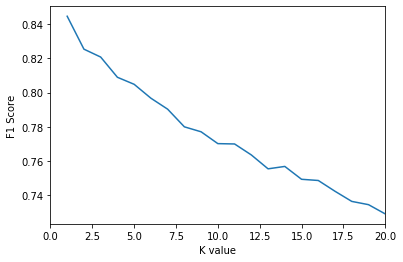

In [9]:
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("F1 Score")

We can see that the F1 scores decline as K increases. We will use the baseline value of k = 1. The f1 score is .8445.

## EDA

There are twelve distinct features available to us:

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal distance to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical distance to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal distance to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade distance at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal distance to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target is **Cover_Type** that designates forest cover type. The 7 cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


### correlation matrix - Stefania
### univariate analysis - Emily
### distribution of soil types and forest cover type - Mohan

In [11]:
ex = df[["Elevation", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


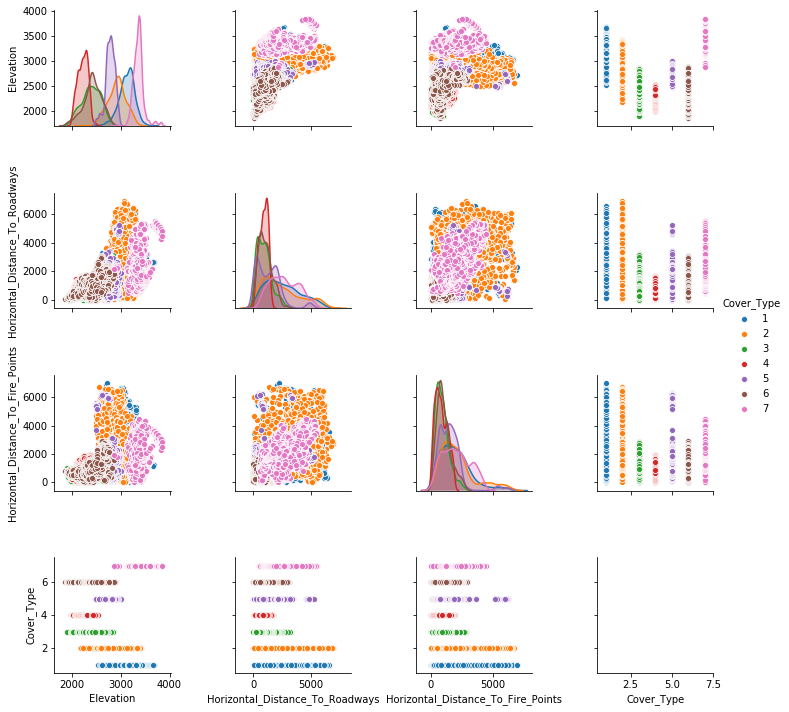

In [12]:
sns.pairplot(ex, hue = "Cover_Type")

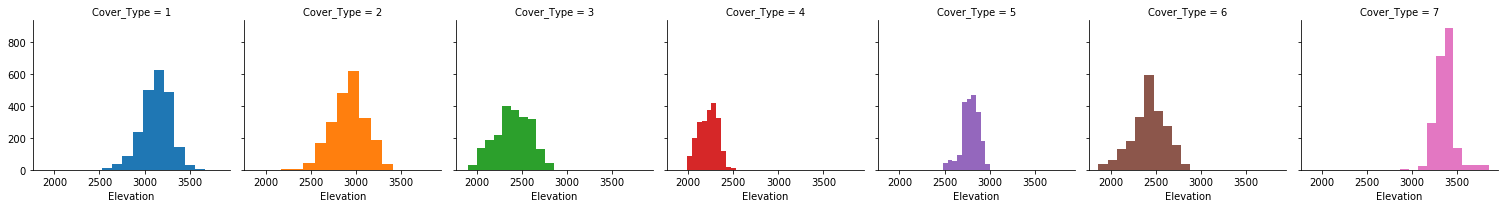

In [13]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Elevation");

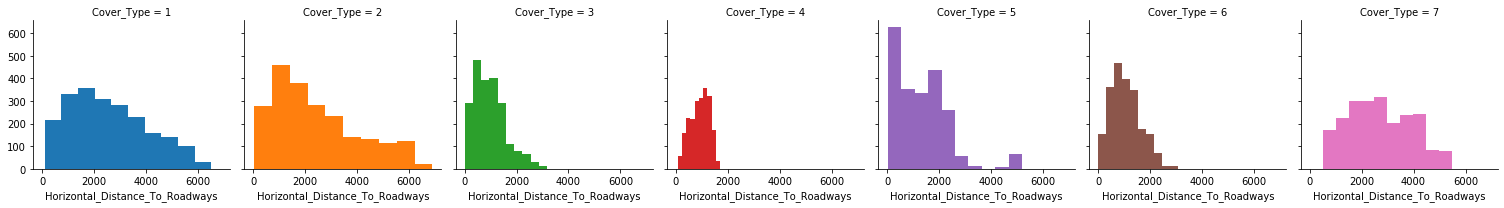

In [14]:
g = sns.FacetGrid(df, col="Cover_Type", hue = "Cover_Type")
g.map(plt.hist, "Horizontal_Distance_To_Roadways");

In [15]:
# Distribution of cover type

coversType = df['Cover_Type']
coversType.describe().T

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

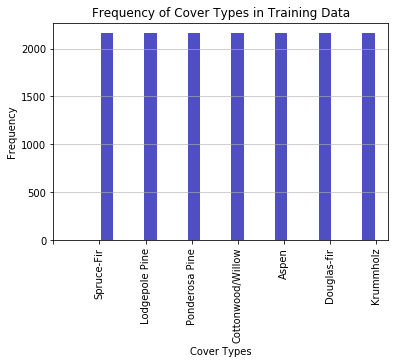

In [16]:
# Distribution of cover type
# Note - Need help on changing the xtick labels - it could look better
# https://realpython.com/python-histograms/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html

import matplotlib.pyplot as plt 

n, bins, patches = plt.hist(x=coversType, color='#0504aa', bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cover Types')
plt.ylabel('Frequency')
plt.title('Frequency of Cover Types in Training Data')
plt.xticks(np.arange(8), ('','Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'), rotation=90)
plt.show()


The distribution of cover types is uniform across the training data set.

### Soil type distribution

Soil type is represented as a binary feature in the data set There are 40 different features for each soil type.

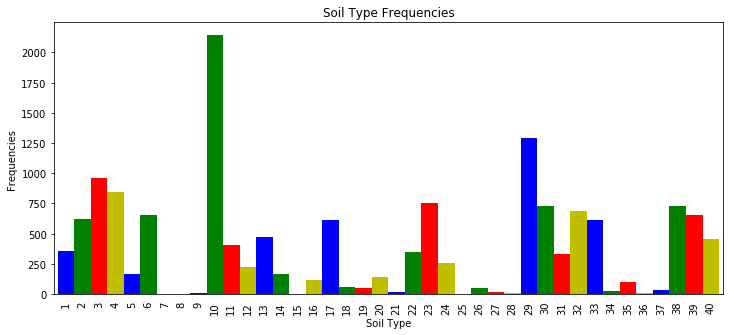

In [17]:
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']
soil_df.columns = range(1,41)
soil_series = soil_df.sum()
colors = ['b', 'g', 'r', 'y']

ax  = soil_series.plot(kind='bar', title = 'Soil Type Frequencies', width=1,figsize=(12, 5), color=colors)
ax.set_xlabel('Soil Type')
ax.set_ylabel('Frequencies')
ax.xaxis.set_ticks_position('none') 
plt.show()

## Data Cleaning

Let us remove ID since this has no significance in predicting cover type. Similarly, we remove soil types 7 and 15 as these have no values represented in data.

In [18]:
# Cleaning data by removing Id, Soil_Type7 and Soil_Type15

train_data = train_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
dev_data = dev_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
test_data = test_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)


print('train_data shape: ',train_data.shape)
print('dev_data shape: ',dev_data.shape)
print('test_data shape: ',test_data.shape)


train_data shape:  (12096, 52)
dev_data shape:  (3024, 52)
test_data shape:  (565892, 52)


### Pre-processing Data

We utilize the Scikit-learn has a `Pipeline` class that applys a list of transformations to the data. We apply SimpleImputer, which replaces missing values with a value based on the `Median` strategy. In this case, `NAN` values will be replaced by the median. We also include a `StandardScaler` step, which subtracts the mean from each of the features and scales to unit variance

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline


##TODO: need to fix this to apply only to non-categorical and non-binary columns
def median_processor(df):
    pipeline1 = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
    df1 = pipeline1.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

In [20]:
median_processor(train_data)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.459435,-0.048570,1.240066,0.710974,2.272350,0.158238,0.953689,0.350988,-0.848744,-0.609228,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
1,0.284791,1.299527,-0.885929,-0.651024,-1.009344,-0.036874,-0.548954,0.789428,1.001114,-0.049528,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
2,0.425942,1.253983,-1.240262,-0.050983,-0.489472,2.538151,-0.287625,0.877116,0.848772,0.205616,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
3,0.184311,-0.112332,0.177069,-0.508157,-0.440733,0.405531,0.953689,0.657896,-0.457009,-0.300180,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
4,-0.456850,1.636551,-0.295375,-0.936758,-0.635686,0.217225,-0.842949,0.044080,0.783483,-0.890425,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,-1.016669,0.343107,1.121955,-0.651024,0.241599,-0.050487,-0.222292,1.359401,0.631142,-0.540051,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12092,-1.468830,0.689240,1.121955,-0.627213,0.014155,-0.449786,-1.430940,1.447089,1.654004,-1.017997,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881
12093,1.533618,0.170040,-0.767818,3.720704,1.638756,0.907680,0.431031,1.184024,0.348223,0.186750,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,4.480309,-0.214487,-0.177881
12094,0.966622,-1.114296,-0.531596,-0.365290,-0.765654,1.032461,0.169701,-0.218985,-0.108801,1.522663,...,-0.147336,-0.219086,-0.204379,-0.037515,-0.084124,-0.025726,-0.046412,-0.223199,-0.214487,-0.177881


Normalize data

In [21]:
#normalize all values (subtract mean, divide by standard deviation) for non-categorical features


def normalize_processor(df):
    column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"])], remainder = "passthrough") 

    dfnorm = column_trans.fit_transform(df)
    dfnorm2 = pd.DataFrame(dfnorm, columns = df.columns)
    return dfnorm2


### Feature Engineering 

We attempt to reduce complexity by creating features by combining existing ones to  optimize our model’s performance. In order to make the best possible prediction we need to make the most of the features we are given. This involves combining two or more significant features, or categorizing different ones to make them more digestable for the model. 

1.  **Euclidian distance to Hydration**
In the Random Forest model we observed that horizontal and vertical distance were both very important features. We believe that combining these features into one would influence the model. Incorporating this new feature we can drop the other 2 features. We use Euclidian distance to combine the features. This is the diagonal distance of the two features.
<br/><br/>
$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

<br/><br/>

2.  **Soil Type** – We observed in the Random Forest model that soil types were individually not very important features. So we decided to aggregate these soil types to create three new features based on their textures: `soil_stony`, `soil_rubbly`, and `soil_other`
<br/><br/>
3. **Hillshade Mean** - We are given the Hillshade index at 9:00 am, noon, and 3:00 pm. Given this information, and the fact that our prior model gave importance to these features, we added another feature `Hillshade_mean`, which represents the average of these three indices.
<br/><br/>
$$ HillshadeMean = \frac{Hillshade9am + Hillshade3pm + HillshadeNoon}{3} $$


<br/><br/>

The data cleaning, feature selection, preprocessing steps, and the feature engineering are all performed in the function `feat_eng`. This will be run on both the training and testing data, to make sure the data are in sync.

In [22]:
def feat_eng(df):
    # Adding Hillshade_Mean Feature
    df['Hillshade_Mean'] =  (df['Hillshade_9am'] + df['Hillshade_Noon']  + df['Hillshade_3pm']) / 3
    
    # Adding Euclidian Distance
    
    #df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(df['Horizontal_Distance_To_Hydrology'] **2 + df['Vertical_Distance_To_Hydrology'] **2 )
    df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(((df['Horizontal_Distance_To_Hydrology']-df['Vertical_Distance_To_Hydrology'])**2).sum())

    # Categorizing Soil Types by texture
    stony_col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type22', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
    rubbly_col = ['Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13']
    other_col = ['Soil_Type8', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type35']
    df['soil_stony'] = df[stony_col].sum(axis=1)
    df['soil_rubbly'] = df[rubbly_col].sum(axis=1)
    df['soil_other'] = df[other_col].sum(axis=1)    

    # ---------- Removing below features ---------
   # df = df.drop(['Id'], axis=1) # Removing 'Id' column
  #  df = df.drop(['Soil_Type7','Soil_Type15'], axis=1)

    return df

In [23]:
pre_processed_data = feat_eng(df)

X2, y = pre_processed_data.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

X_preproc = median_processor(X2)
print(X_preproc.shape)

test_data_preproc = feat_eng(test_data)
test_data_preproc = median_processor(test_data_preproc)

(15120, 60)


### Decision trees for Feature Selection

#### Start with one tree

In [24]:
# create a baseline random forest using all the features 


RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_data_label) # Fitting the train data to the classifier 
#predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
print("F1 score of baseline Random Forest = " + str(RF_f1))

F1 score of baseline Random Forest = 0.8538119250862639


In [25]:
# Important features of the random forest

importances = RF_baseline.feature_importances_
indices = np.argsort(importances)[::-1] 
print("Random Forest top impportant features")
importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])

for i in range(len(indices)):
    importance = np.around(importances[indices[i]],decimals=4)
    feature = train_data.columns[indices[i]]
    rank = i + 1
    importances_df.loc[i] = [rank, feature, importance]


# List the feature importances of the forest

importances_df

Random Forest top impportant features


,Rank,Feature,Importance
0,1,Elevation,0.2330
1,2,Horizontal_Distance_To_Roadways,0.0871
2,3,Horizontal_Distance_To_Fire_Points,0.0712
3,4,Horizontal_Distance_To_Hydrology,0.0614
4,5,Wilderness_Area4,0.0528
5,6,Vertical_Distance_To_Hydrology,0.0507
6,7,Hillshade_9am,0.0501
7,8,Aspect,0.0478
8,9,Hillshade_3pm,0.0441
9,10,Hillshade_Noon,0.0421


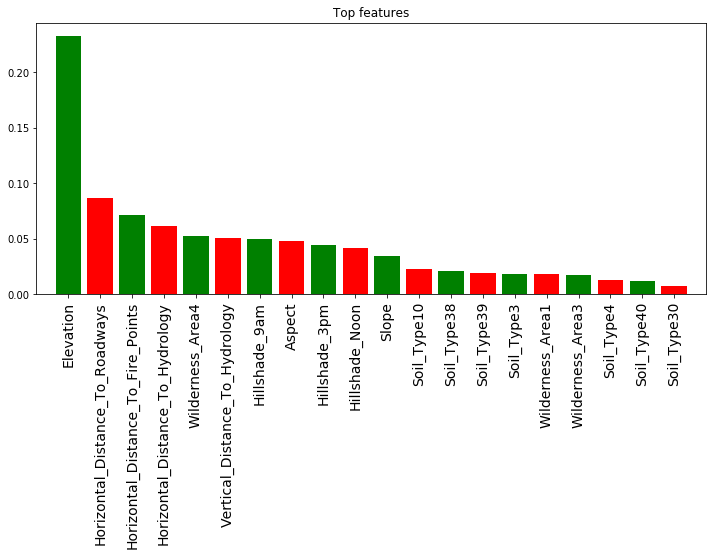

In [26]:
# Plot the feature importances of the forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

indices=indices[:20] 
plt.figure(figsize = (12,5)) 
plt.title("Top features") 
plt.bar(range(20), importances[indices], color="gr", align="center") 
plt.xticks(range(20), train_data.columns[indices], fontsize=14, rotation=90) 
plt.xlim([-1, 20]) 
plt.show()


Processor that keeps only most important features

In [27]:

#train_data[]

In [28]:
# returns a dataframe with subset of n most important features based on RF model
def rf_feature_selector(df, n_features):
    df1 = df[importances_df['Feature'][:n_features]]
    return df1

The Random Forest baseline model performs well on the training data, with a 0.85 F1 score.

Elevation is exteremly significant, followed by Horizontal distance to Roadways, Fire points and Hydrology. 

## L1 Regularization for Feature Selection

In [29]:

 
lg = LogisticRegression(C=.1, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
lg.fit(train_data, train_data_label)
lg_pred= lg.predict(dev_data)
accuracy = metrics.f1_score(dev_data_label, lg_pred, average="weighted")
print("F1:", accuracy)
print("")
vert_sum_coefs = lg.coef_.sum(axis = 0)
#print(vert_sum_coefs)
print("Features with coefficient < 0.05:")
low_coef_list = []
for i in range(len(vert_sum_coefs)):
    if abs(vert_sum_coefs[i]) < 0.05:
        print(train_data.columns[i],"|",vert_sum_coefs[i])
        low_coef_list.append(train_data.columns[i])
        
features_coefs = list(zip(train_data.columns,vert_sum_coefs))
features_coefs_df = pd.DataFrame(features_coefs, columns=['feature','L1_coef'])
print(features_coefs_df.sort_values(by='L1_coef'))
            
#ordered_list = np.argsort(vert_sum_coefs)
#print(ordered_list)

F1: 0.6509829050758452

Features with coefficient < 0.05:
Elevation | 0.0014725699960634218
Aspect | 0.002136343922676241
Horizontal_Distance_To_Hydrology | -0.005443305094718191
Vertical_Distance_To_Hydrology | 0.006468467145786927
Horizontal_Distance_To_Roadways | -0.0003868147568731649
Hillshade_Noon | 0.010326093483389805
Horizontal_Distance_To_Fire_Points | 0.00013931189640861496
Soil_Type8 | 0.0
Soil_Type9 | 0.0
Soil_Type21 | 0.0
Soil_Type25 | 0.0
Soil_Type27 | 0.0
Soil_Type28 | 0.0
Soil_Type34 | 0.0
Soil_Type36 | 0.0
                               feature   L1_coef
13                    Wilderness_Area4 -3.559773
50                         Soil_Type39 -1.930275
10                    Wilderness_Area1 -1.929411
51                         Soil_Type40 -1.903118
49                         Soil_Type38 -1.800075
11                    Wilderness_Area2 -1.036471
2                                Slope -0.231115
6                        Hillshade_9am -0.064939
8                        Hill

In [30]:
# returns df that drops columns that have coefficients below 0.5 after L1 regularization in logistic regression

def l1reg_feature_selector(df):
    df1 = df.drop(low_coef_list, axis = 1)
    return df1



## Pre-processed Data Sets

In [31]:
train_data_median_trans = median_processor(train_data)
train_data_norm = normalize_processor(train_data)
train_data_rf_selector = rf_feature_selector(train_data,10)
train_data_l1reg_selector = l1reg_feature_selector(train_data)
train_data_feat_eng = feat_eng(train_data)
train_feat_norm = feat_eng(normalize_processor(train_data))


dev_data_median_trans = median_processor(dev_data)
dev_data_norm = normalize_processor(dev_data)
dev_data_rf_selector = rf_feature_selector(dev_data,10)
dev_data_l1reg_selector = l1reg_feature_selector(dev_data)
dev_data_feat_eng = feat_eng(dev_data)
dev_feat_norm = feat_eng(normalize_processor(dev_data))
train_datasets = [train_data_median_trans, train_data_norm, train_data_rf_selector, train_data_l1reg_selector, train_data_feat_eng, train_feat_norm]

dev_datasets = [dev_data_median_trans, dev_data_norm, dev_data_rf_selector, dev_data_l1reg_selector, dev_data_feat_eng, dev_feat_norm]

transformation_names = ["Median Pre-processor", "Normalize", "Feat Selector RF", "Feat Selector L1 Reg", "Feat Eng", "Norm Feat Eng"]


## Random Forest With Processed Data

In [32]:
RF_revised = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
for ds in range(len(train_datasets)):
    RF_revised.fit(train_datasets[ds], train_data_label) # Fitting the train data to the classifier 
    #predict = RF_revised.predict(test_data)
    RF_revised_pred = RF_revised.predict(dev_datasets[ds])
    RF_revised_f1 = metrics.f1_score(dev_data_label, RF_revised_pred, average='macro')
    print("Transformation:", transformation_names[ds])
    print("F1 score of revised Random Forest = " + str(RF_revised_f1))

Transformation: Median Pre-processor
F1 score of revised Random Forest = 0.8440299249482969
Transformation: Normalize
F1 score of revised Random Forest = 0.8453421854845132
Transformation: Feat Selector RF
F1 score of revised Random Forest = 0.8259899464664974
Transformation: Feat Selector L1 Reg
F1 score of revised Random Forest = 0.6282091619738946
Transformation: Feat Eng
F1 score of revised Random Forest = 0.846780214001053
Transformation: Norm Feat Eng
F1 score of revised Random Forest = 0.8442496746834138


### Extra trees

Extra trees add a layer of randomization to decision tree modeling. It takes into account the whole learning sample.

In [34]:
# NOTE - this step takes time - implement only once

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

params = {'max_features': [0.8, 1], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}

clf = GridSearchCV(ExtraTreesClassifier(), params)

for ds in range(len(train_datasets)):
    clf.fit(train_datasets[ds], train_data_label)
    print("Transformation:", transformation_names[ds])
    print("Best parameters:", clf.best_params_) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Median Pre-processor
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Normalize
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 500}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Feat Selector RF
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 500}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Feat Selector L1 Reg
Best parameters: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 500}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Feat Eng
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 500}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Transformation: Norm Feat Eng
Best parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 500}


In [38]:
import time
index = np.array([0, 1, 2,3,4])
model_performance_df = pd.DataFrame(columns = ['Model Name', 'Train Time(s)', 'Prediction Time(s)', 'F1 Score'], index=index)

In [41]:

    
ExtraTree_clf = ExtraTreesClassifier(max_features='auto', max_depth = 30, n_estimators=500)

start_train = time.time()
ExtraTree_clf.fit(train_data_feat_eng, train_data_label) # Fitting the train data to the classifier   
end_train = time.time()
train_time = str(round(end_train - start_train, 2))
    
# Make prediction on dev data
start_test = time.time()
pred = ExtraTree_clf.predict(dev_data_feat_eng)
end_test = time.time()
test_time = str(round(end_test - start_test, 2))
    
# Store metrics
dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 2)
print("F1 Score for Extra Trees = " + str(dev_f1))
model_performance_df.iloc[0] = ['Extra Trees', train_time, test_time, dev_f1]

F1 Score for Extra Trees = 0.85


### XGBoost (Extreme Gradient Boosting)

XGBoost uses gradient descent to compensate for some of the downsides of the previous decision tree model. It builds trees in series, and increases weights of incorrectly classified nodes, while decreasing those of the correctly classified. This uses the concept of "boosting" to continually improve a model by focusing on missclassifications.

In [ ]:
import xgboost as xgb

params = {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [50,100,200,500], 'max_depth': [10, 20, 30]}
clf = GridSearchCV(xgb.XGBClassifier(), params)

for ds in range(len(train_datasets)):
    clf.fit(train_datasets[ds], train_data_label)
    print("Transformation:", transformation_names[ds])
    print("Best parameters:", clf.best_params_) 
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth = 10, n_estimators = 500, learning_rate = 0.1)

start_train = time.time()
xgb_clf.fit(train_data_feat_eng, train_data_label) # Fitting the train data to the classifier   
end_train = time.time()
train_time = str(round(end_train - start_train, 2))
    
# Make prediction on dev data
start_test = time.time()
pred = xgb_clf.predict(dev_data_feat_eng)
end_test = time.time()
test_time = str(round(end_test - start_test, 2))
    
# Store metrics
dev_f1 = round(metrics.f1_score(dev_data_label, pred, average='macro'), 2)
print("F1 Score for Extreme Gradient Boost = " + str(dev_f1))
model_performance_df.iloc[1] = ['Extreme Gradient Boost', train_time, test_time, dev_f1]

### SVM - Mohan

Support Vector Machines are a fast supervised learning model that perform non-linear classification. T

In [43]:

def process_model(clf, clf_name, idx):
    start_train = time.time()
    clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))
    
    # Make prediction on dev data
    start_test = time.time()
    pred = clf.predict(dev_data2)
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))
    
    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
    print('F1 Score for ' + clf_name + " = " + str(dev_f1))
    model_performance_df.iloc[idx] = [clf_name, train_time, test_time, dev_f1]
    

In [ ]:
# NOTE - this step takes time - implement only once

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
clf = GridSearchCV(SVC(), params)
clf.fit(train_data2, train_labels2)
print(clf.best_params_) 

In [45]:
# Pipeline for fitting model, making predictions, and saving performance metrics
# Using the values for the params from the grid search above

svm_clf =  SVC(kernel="rbf", gamma=.05, C=100)

start_train = time.time()
svm_clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
end_train = time.time()
train_time = str(round(end_train - start_train, 2))
    
# Make prediction on dev data
start_test = time.time()
pred = svm_clf.predict(dev_data2)
end_test = time.time()
test_time = str(round(end_test - start_test, 2))
    
# Store metrics
dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
print("F1 Score for SVM = " + str(dev_f1))
model_performance_df.iloc[0] = ['SVM', train_time, test_time, dev_f1]

F1 Score for SVM = 0.83


### Gradient Descent

### Ensemble

## Decision Tree

In [46]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(train_data, train_data_label)

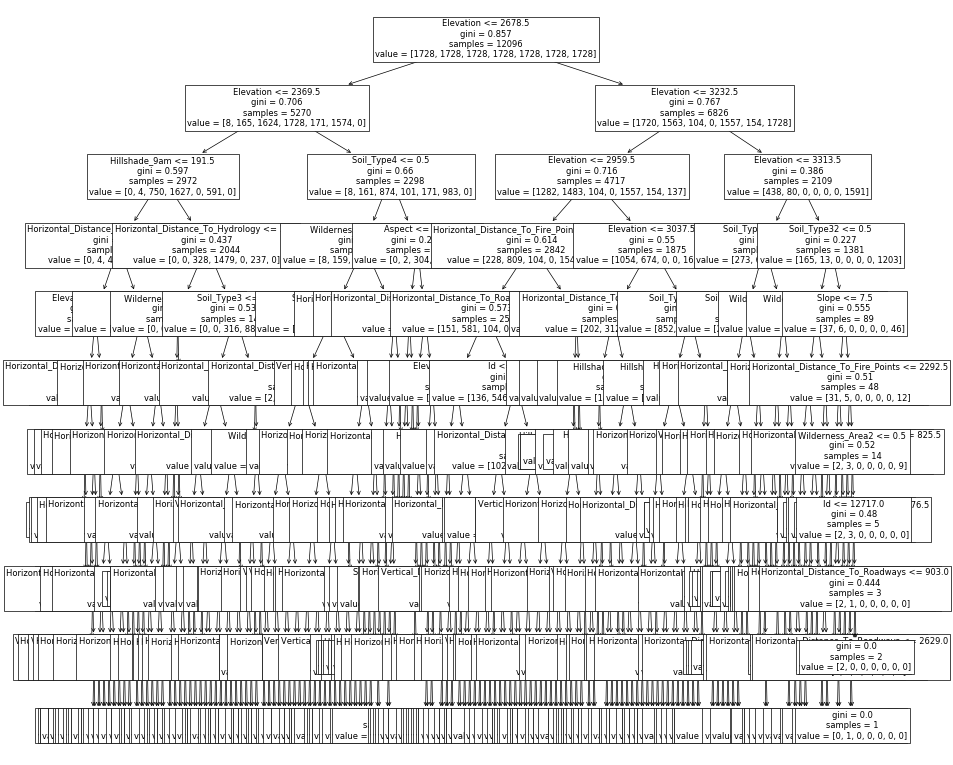

In [47]:
%matplotlib inline
plt.figure(figsize = (20, 20), dpi = 50)
tree.plot_tree(clf, fontsize =12, feature_names=train_data.columns,rotate = True) 

plt.show()

In [48]:
tree_pred= clf.predict(dev_data)
accuracy = metrics.f1_score(dev_data_label, tree_pred, average="weighted")
print("Accuracy", accuracy)

Accuracy 0.7565239881182356


/Users/shalac/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


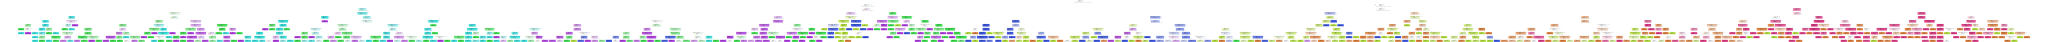

<Figure size 1440x1440 with 0 Axes>

In [49]:
import graphviz 
import pydotplus
import matplotlib.image as mpimg
import io
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

%matplotlib inline
plt.figure(figsize = (20, 20))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=train_data.columns,  
                     # class_names=iris.target_names,  
                      filled=True, rounded=False,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
